In [19]:
import numpy as np
from sklearn.datasets import fetch_openml


In [2]:
mnist = fetch_openml('mnist_784', version=1)
print(mnist.keys())
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

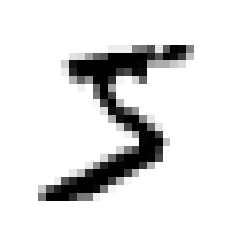

In [16]:
# In this dataset there are 70000 images and 784 features, this is because each image is 28 X 28 pixels.
# Lets display one of the image
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.imshow(X.loc[0, :].values.reshape(28,28), cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [17]:
y[0]

'5'

In [20]:
y = y.astype(np.uint8)

In [21]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Lets train Binary Classification
For now lets train classification model which will predict if a class is 5 or not

In [23]:
y_train_5 = y_train == 5
y_test_5 = y_test == 5

In [24]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [28]:
sgd_clf.predict([X.loc[0, :]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([ True])

In [39]:
# Lets impliment Stratified K Fold Cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)#, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.loc[train_index,]
    y_train_folds = y_train_5.loc[train_index,]
    X_test_folds = X_train.loc[test_index,]
    y_test_folds = y_train_5.loc[test_index,]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct/len(y_pred))



0.95035
0.96035
0.9604


In [36]:
test_index

array([    0,     1,     2, ..., 20331, 20342, 20359])